In [65]:
import numpy as np 

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

import IPython

from scipy import signal as sp
from scipy.io import wavfile
from scipy.fft import fft, ifft

Defining $\alpha = 1 + mod(x, 3)$

In [66]:
alpha = 1 + 260 % 3
print(alpha)

3


# Problem 1


In [67]:
fs = 120
T = 1/fs

t_duration = 2
N = t_duration/T
n = np.arange(N)

signal = np.sin( 2 * np.pi * 15 * alpha * n * T)
t = n * T


In [68]:
signal_120 = signal[:120]
#markerline, stemline, baseline, = plt.stem(signal_120)
#plt.setp(markerline, markersize = 3)


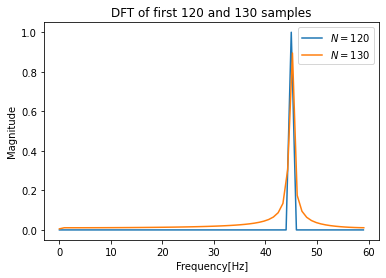

In [69]:
N_120 = len(signal_120)
dft_120 = np.fft.fft(signal_120)[0:int(N_120/2)]/N_120
dft_120[1:] = 2*dft_120[1:]
f_120 = fs * np.arange(N_120/2)/N_120


signal_130 = signal[:130]
N_130 = len(signal_130)
dft_130 = np.fft.fft(signal_130)[0 : int(N_130/2)]/N_130
dft_130[1:] = 2 * dft_130[1 :]
f_130 = fs * np.arange(N_130/2)/N_130


plt.plot(f_120, abs(dft_120))
plt.plot(f_130, abs(dft_130))
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.title("DFT of first 120 and 130 samples")
plt.legend(["$N = 120$", "$N = 130$"])
plt.savefig("Q1_1")


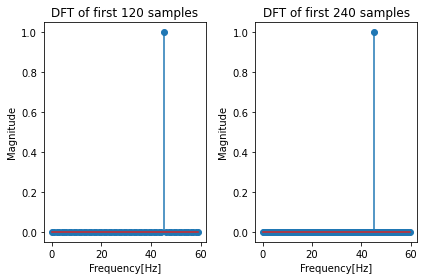

In [70]:
signal_240 = signal[:240]
N_240 = len(signal_240)
dft_240 = np.fft.fft(signal_240)[0 : int(N_240/2)]/N_240
dft_240[1:] = 2 * dft_240[1 :]
f_240 = fs * np.arange(N_240/2)/N_240

plt.subplot(1, 2, 1)
plt.title("DFT of first 120 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.stem(f_120, abs(dft_120))
plt.subplot(1, 2, 2)
plt.title("DFT of first 240 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.stem(f_240, abs(dft_240))
plt.tight_layout()
plt.savefig("Q1_2")

# Problem 2

In [71]:
fs_2 = 200
A = 160
B = 166
T_2 = 1/fs_2
t_duration2 = 10

N_2 = t_duration2/T_2
n_2 = np.arange(N_2)
signal_2 = 0.1 * np.sin(A * np.pi * n_2 * T_2 ) + np.cos(B* np.pi * n_2 * T_2)
t_2 = n_2 * T_2

def dft(signal, N, fs) :
    dft = np.fft.fft(signal, N)[0 : int(N/2)]/N
    dft[1:] = 2 * dft[1:]
    F = fs * np.arange(int(N/2))/N
    return F, abs(dft)

F_215, dft_215 = dft(signal_2[0:215], 215, fs_2)
F_415, dft_415 = dft(signal_2[0:415], 415, fs_2)
F_1115, dft_1115 = dft(signal_2[0:1115], 1115, fs_2)
F_1515, dft_1515 = dft(signal_2[0:1515], 1515, fs_2)
F_1915, dft_1915 = dft(signal_2[0:1915], 1915, fs_2)

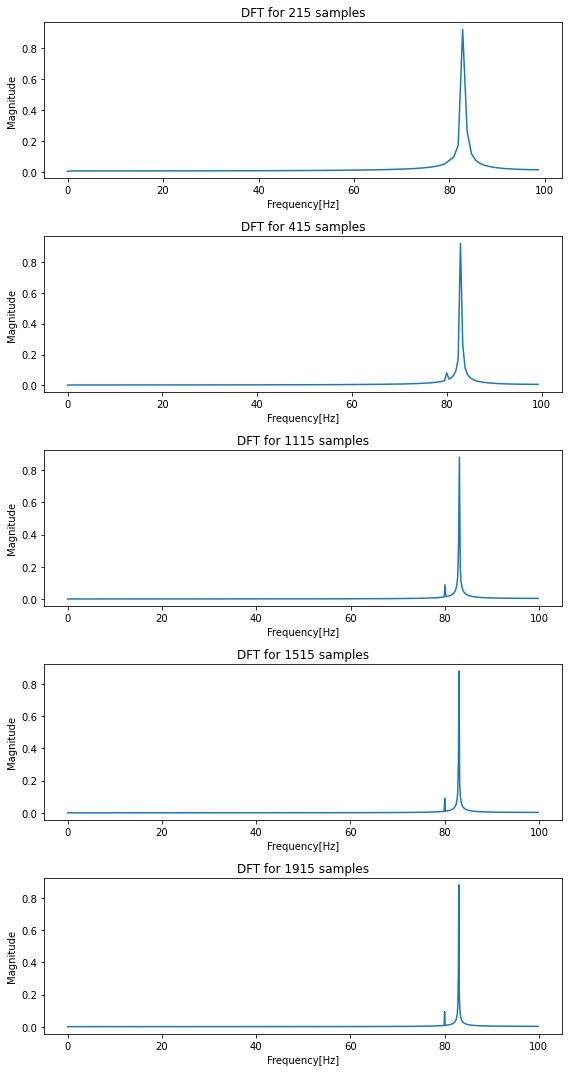

In [72]:
plt.figure(figsize=(8,15))
plt.subplot(5, 1, 1)
plt.title("DFT for 215 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_215, dft_215)
plt.subplot(5, 1 , 2)
plt.title("DFT for 415 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_415, dft_415)
plt.subplot(5, 1 , 3)
plt.title("DFT for 1115 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_1115, dft_1115)
plt.subplot(5, 1 , 4)
plt.title("DFT for 1515 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_1515, dft_1515 )
plt.subplot(5, 1 , 5)
plt.title("DFT for 1915 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_1915, dft_1915 )
plt.tight_layout()
plt.savefig("Q2_1")

# Problem 3

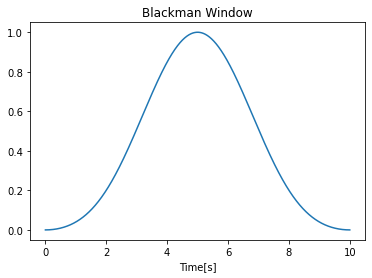

In [73]:
window = np.blackman(len(signal_2))
plt.plot(t_2, window)
plt.title("Blackman Window")
plt.xlabel("Time[s]")
plt.savefig("Q3_1")
#signal_3 = window * signal_2

F_215, dft_215 = dft(signal_2[0:215] * np.blackman(215) , 215, fs_2)
F_415, dft_415 = dft(signal_2[0:415]* np.blackman(415), 415, fs_2)
F_1115, dft_1115 = dft(signal_2[0:1115]* np.blackman(1115), 1115, fs_2)
F_1515, dft_1515 = dft(signal_2[0:1515]* np.blackman(1515), 1515, fs_2)
F_1915, dft_1915 = dft(signal_2[0:1915]* np.blackman(1915), 1915, fs_2)

In [74]:
def dftwithpadding(signal, N, fs) :
    dft = np.fft.fft(signal, N)[0 : int(N/2)]/len(signal)
    dft[1:] = 2 * dft[1:]
    F = fs * np.arange(int(N/2))/N
    return F, abs(dft)

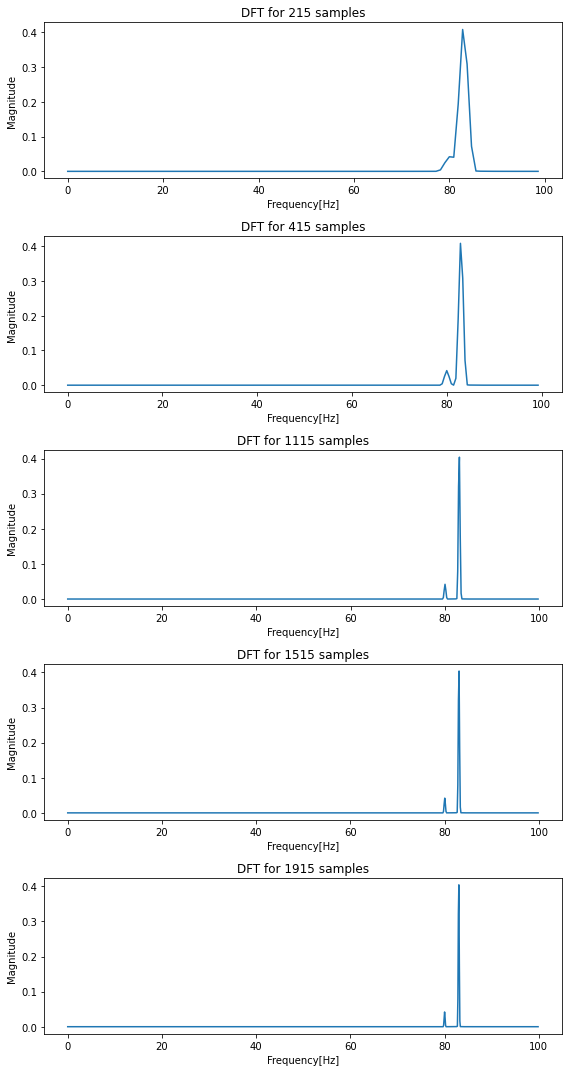

In [75]:
plt.figure(figsize=(8,15))
plt.subplot(5, 1, 1)
plt.title("DFT for 215 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_215, dft_215)
plt.subplot(5, 1 , 2)
plt.title("DFT for 415 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_415, dft_415)
plt.subplot(5, 1 , 3)
plt.title("DFT for 1115 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_1115, dft_1115)
plt.subplot(5, 1 , 4)
plt.title("DFT for 1515 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_1515, dft_1515 )
plt.subplot(5, 1 , 5)
plt.title("DFT for 1915 samples")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.plot(F_1915, dft_1915 )
plt.tight_layout()
plt.savefig("Q3_2")

# Problem 4

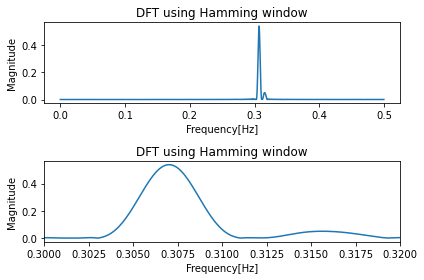

In [76]:
y = np.loadtxt("Exp4Data3.txt", delimiter = ',')
Fre, Mag = dftwithpadding(y* np.hamming(len(y)), 10000, 1)
plt.subplot(2, 1, 1)
plt.plot(Fre, Mag)
plt.title("DFT using Hamming window")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.subplot(2, 1, 2)
plt.plot(Fre, Mag)
plt.xlim(0.3, 0.32)
plt.title("DFT using Hamming window")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.savefig("Q4_1")

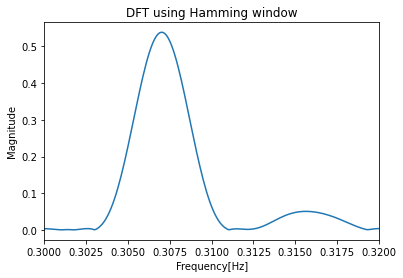

In [77]:
plt.plot(Fre, Mag)
plt.xlim(0.3, 0.32)
plt.title("DFT using Hamming window")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.savefig("Q4_2")
plt.show()

### Finding Peaks

In [78]:
peaks, _ = sp.find_peaks(Mag)
#plt.stem(peaks, Mag[peaks])
frequency1 = max(Mag[peaks])
print(frequency1)
print(list(Mag).index(frequency1))
print(Fre[list(Mag).index(frequency1)])
Mag2 = Mag[3071:]
#plt.plot(Mag2)
peaks2, _ = sp.find_peaks(Mag2)
#plt.stem(peaks2, Mag2[peaks2])
frequency2 = max(Mag2[peaks2])
print(frequency2)
print(list(Mag).index(frequency2))
print(Fre[list(Mag).index(frequency2)])

0.538689556006596
3070
0.307
0.05051723914675239
3156
0.3156


### Using Rectangular Window

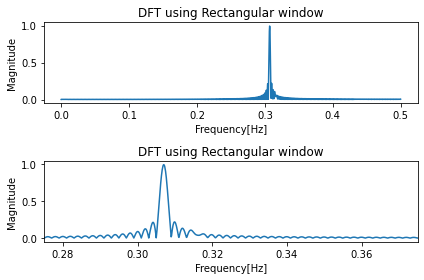

In [79]:
Fre_2, Mag_2 = dftwithpadding(y, 10000, 1)
plt.subplot(2,1, 1)
plt.plot(Fre_2, Mag_2)
plt.title("DFT using Rectangular window")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.subplot(2, 1, 2)
plt.plot(Fre_2, Mag_2)
plt.title("DFT using Rectangular window")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.xlim(0.275, 0.375)
plt.tight_layout()
plt.savefig("Q4_3")

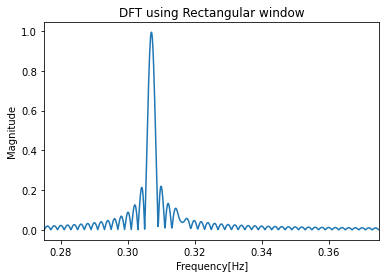

In [80]:
plt.plot(Fre_2, Mag_2)
plt.title("DFT using Rectangular window")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.xlim(0.275, 0.375)
plt.savefig("Q4_4")
plt.show()

In [81]:
peaks_2, _ = sp.find_peaks(Mag_2)
#plt.stem(peaks_2, Mag_2[peaks_2])
frequency1_2 = max(Mag_2[peaks_2])
print(frequency1_2)
print(list(Mag_2).index(frequency1_2))
print(Fre_2[list(Mag_2).index(frequency1_2)])

0.9934180786893626
3070
0.307


In [82]:
Mag2_2 = Mag_2[3071:]
peaks2_2, _ = sp.find_peaks(Mag2_2)
#plt.stem(peaks2_2, Mag2_2[peaks2_2])
frequency2_2 = max(Mag2_2[peaks2_2])
print(frequency2_2)
print(list(Mag_2).index(frequency2_2))
print(Fre_2[list(Mag_2).index(frequency2_2)])

0.21942536197233378
3099
0.3099
